In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
player_info_df = ("C:/Users/iCloud Drive/Desktop/untitled folder/Player_Info T20 WC 2024.csv")


In [116]:
# Display the first few rows of each dataframe
player_info_df.head(), match_summary_df.head(), bowling_summaries_df.head(), batting_summaries_df.head()

(          team                name                 role       age  \
 0  Afghanistan  Rahmanullah Gurbaz  Wicketkeeper Batter  22y 155d   
 1  Afghanistan   Hazratullah Zazai       Opening Batter   26y 39d   
 2  Afghanistan      Ibrahim Zadran       Opening Batter  22y 141d   
 3  Afghanistan      Mohammad Ishaq  Wicketkeeper Batter   19y 90d   
 4  Afghanistan   Najibullah Zadran  Middle order Batter   31y 73d   
 
     batting_style           bowling_style  
 0  Right hand Bat        Right arm Medium  
 1   Left hand Bat  Slow Left arm Orthodox  
 2  Right hand Bat   Right arm Medium fast  
 3  Right hand Bat                     NaN  
 4   Left hand Bat      Right arm Offbreak  ,
   Match No.  Match Date                                              Venue  \
 0       1st  2024-06-01                      Grand Prairie Stadium, Dallas   
 1       2nd  2024-06-02                         Providence Stadium, Guyana   
 2       3rd  2024-06-02              Kensington Oval, Bridgetown, Bar

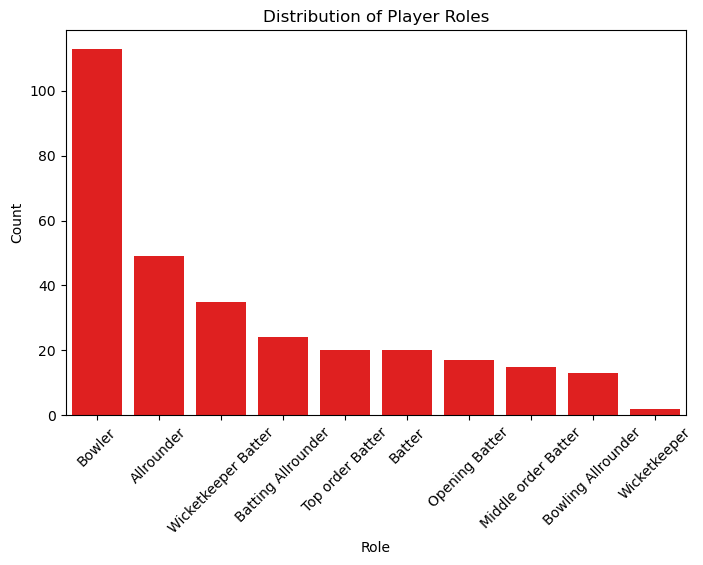

In [141]:
# Distribution of player roles
plt.figure(figsize=(8, 5))
sns.countplot(data=player_info_df, x='role', order=player_info_df['role'].value_counts().index, color='red')
plt.title('Distribution of Player Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('Distribution of Player Roles.png')
plt.show()


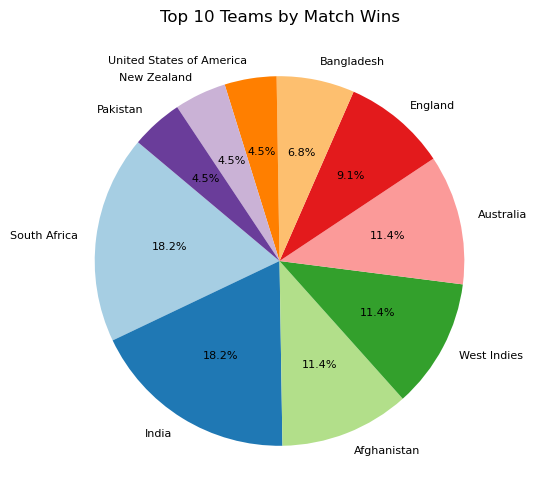

In [143]:
# Count the number of wins for each team and select the top 10 teams
win_counts = match_summary_df['Winners'].value_counts().head(10)

# Create the pie chart with smaller font size for percentage labels
plt.figure(figsize=(8, 6))
plt.pie(
    win_counts, 
    labels=win_counts.index, 
    autopct=lambda pct: f'{pct:.1f}%',  # Format percentage text
    startangle=140, 
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 8}  # Set font size for the labels
)
plt.title('Top 10 Teams by Match Wins')
plt.savefig('Top 10 Teams by Match Wins.png')
plt.show()


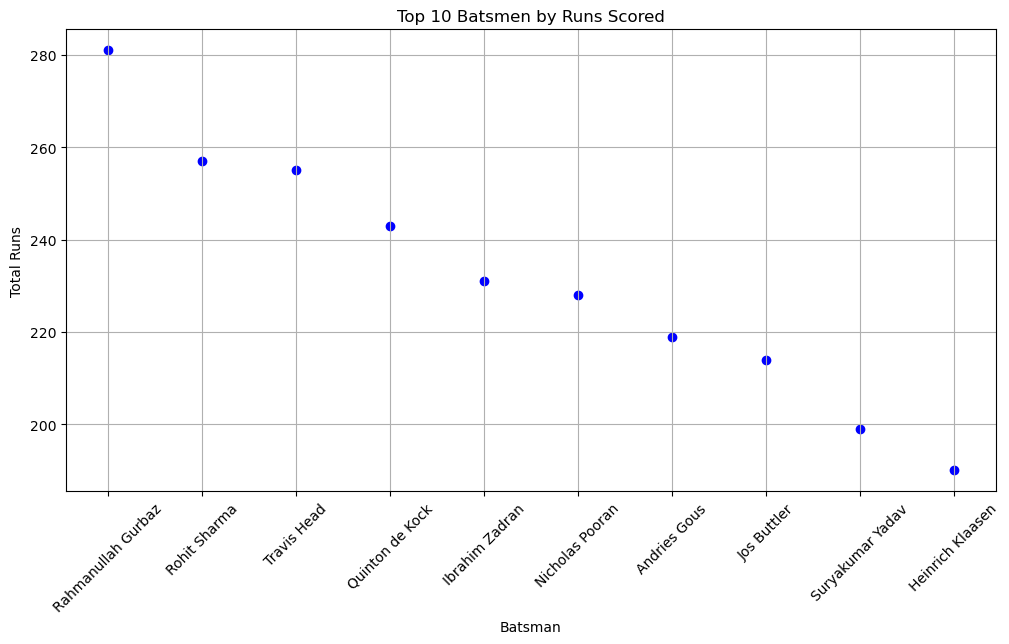

In [145]:
# Top batsmen by runs scored
top_batsmen = batting_summaries_df.groupby('batsmanName')['runs'].sum().sort_values(ascending=False).head(10)

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(top_batsmen.index, top_batsmen.values, color='blue')
plt.title('Top 10 Batsmen by Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Top 10 Batsmen by Runs Scored.png')
plt.show()


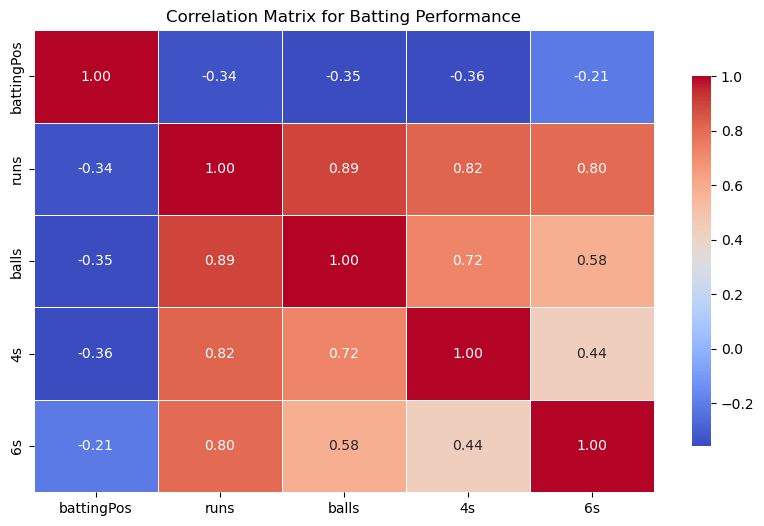

In [147]:
# Select only the numerical columns
numeric_batting_data = batting_summaries_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
batting_corr = numeric_batting_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(batting_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix for Batting Performance')
plt.show()
